# Capital Asset Pricing Model and Multifactor Regression Models

## What is CAPM?

The Capital Asset Pricing Model (CAPM) measures the relationship between the expected return and the risk of investing in security. This model is used to analyze securities and price them given the expected rate of return and cost of capital involved. The model takes into account the asset's sensitivity to non-diversifiable risk (also known as systematic risk or market risk), often represented by the quantity beta (β) in the financial industry, as well as the expected return of the market and the expected return of a theoretical risk-free asset. It is formally represented as foloows :

$ \mathbb{E}{(R_i)} = {R_f} + {\beta_i}{(\mathbb{E}{(R_m)} - {R_f})} $

where, 
- $ \mathbb{E}{(R_i)}$ is the expected return on the capital asset 
- $ {R_f} $ is the risk free rate of interest
- ${\beta_i}$ (the beta) is the sensitivity of the expected excess asset returns to the expected excess market returns
- $ {(\mathbb{E}{(R_m)} - {R_f})} $ is sometimes known as the market premium (the difference between the expected market rate of return and the risk-free rate of return) or risk premium for holding a risky assest.


In [1]:
# Importing Library necessary for the project
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.figsize'] = [18, 11]
np.set_printoptions(formatter={'float': lambda x: f'{x:5.2f}'})
import yfinance as yf
import scipy.optimize as sco

In [2]:
#Defining Assets that we screened for value investment and downloading data for all the value stocks in s&P 500.
r = 0.0125
symbols = ['ABT', 'ALGN', 'ALL', 'AMZN', 'ABC', 'ANSS', 'AJG', 'AIZ', 'BLK', 'BBY', 'BIO', 'BRO', 'CDW', 'CMG', 'CRL', 'CLX', 'COST', 'DHI', 'DHR', 'DVA', 'CPRT', 'DG', 'LLY', 'EPAM', 'ETSY', 'FTNT', 'FBHS', 'FISV', 'GNRC', 'GRMN', 'HSY', 'ICE', 'INTU', 'LH', 'LHX', 'KLAC', 'LEN', 'MLM', 'MMC', 'MSFT', 'NDAQ', 'MCO', 'MS', 'MNST', 'NVR', 'PAYC', 'PFE', 'POOL', 'PKI', 'PHM', 'RJF', 'DGX', 'REGN', 'RMD', 'SPGI', 'RSG', 'TTWO', 'TER', 'SNPS', 'TROW', 'TGT', 'TMO', 'TSCO', 'UHS', 'VRTX', 'WST', 'ZTS','^GSPC']
start = "2015-01-01"
end = "2022-07-13"
stocks_df = pd.DataFrame()
for stock_name in symbols:
    # daily data
    stocks_df[stock_name] = yf.download(stock_name,start,end)['Adj Close']  
    
stocks_df = round(stocks_df,2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
stocks_df

,ABT,ALGN,ALL,AMZN,ABC,ANSS,AJG,AIZ,BLK,BBY,...,SNPS,TROW,TGT,TMO,TSCO,UHS,VRTX,WST,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,39.07,55.91,60.13,15.52,79.84,82.00,39.67,58.47,296.45,30.82,...,43.47,66.77,61.63,122.40,71.39,108.21,118.80,51.25,40.95,2058.90
2015-01-02,38.96,56.20,60.02,15.43,80.10,81.64,39.58,57.91,295.76,30.67,...,43.10,66.69,61.16,125.16,70.71,107.92,123.07,50.21,41.21,2058.20
2015-01-05,38.97,56.99,58.83,15.11,79.42,80.86,39.35,56.61,288.11,29.88,...,42.54,65.16,60.06,123.44,69.26,105.72,121.03,49.52,40.96,2020.58
2015-01-06,38.53,57.45,58.79,14.76,79.85,79.26,39.27,55.83,283.63,29.61,...,42.16,64.01,60.05,122.29,68.20,105.75,117.36,48.67,40.56,2002.61
2015-01-07,38.84,59.57,59.76,14.92,81.45,79.71,39.65,56.05,289.63,30.47,...,42.21,64.95,62.33,125.96,70.41,108.92,120.66,49.46,41.40,2025.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,108.69,249.54,131.14,114.33,139.84,247.42,168.34,174.68,614.74,68.52,...,309.63,116.82,144.81,556.04,197.55,102.25,291.16,315.55,178.50,3845.08
2022-07-07,109.49,259.64,131.20,116.33,140.79,252.34,167.30,175.12,623.70,70.89,...,319.43,118.92,149.96,553.76,203.44,105.29,294.17,320.26,179.10,3902.62
2022-07-08,109.26,261.52,130.87,115.54,142.55,249.65,166.76,175.09,619.56,71.17,...,317.54,115.96,147.99,553.71,203.96,103.44,294.29,318.48,177.98,3899.38


Lets calculate daily return and covriance matrix of all the stocks in our portfolio

In [4]:
#Calculating daily returns for all stocks in our portfolio aswell as the market return
returns = stocks_df.pct_change().dropna()
cov_mat = returns.cov() * 252
cov_mat

,ABT,ALGN,ALL,AMZN,ABC,ANSS,AJG,AIZ,BLK,BBY,...,SNPS,TROW,TGT,TMO,TSCO,UHS,VRTX,WST,ZTS,^GSPC
ABT,0.061382,0.051896,0.025531,0.032016,0.030452,0.042345,0.029261,0.024323,0.040162,0.031252,...,0.038980,0.037860,0.024387,0.042838,0.025073,0.032972,0.041920,0.036689,0.037853,0.031850
ALGN,0.051896,0.213383,0.040136,0.057015,0.040466,0.071480,0.045033,0.042182,0.060546,0.063581,...,0.066104,0.062125,0.029226,0.047531,0.031723,0.060426,0.051704,0.045858,0.055998,0.050629
ALL,0.025531,0.040136,0.056153,0.019923,0.026428,0.029397,0.032712,0.038248,0.037734,0.034655,...,0.025372,0.038307,0.021388,0.022139,0.023215,0.040008,0.022399,0.021218,0.026331,0.029390
AMZN,0.032016,0.057015,0.019923,0.103541,0.020378,0.055567,0.025436,0.020076,0.039736,0.036241,...,0.052846,0.042025,0.026669,0.034295,0.031664,0.023809,0.042299,0.033161,0.035085,0.037090
ABC,0.030452,0.040466,0.026428,0.020378,0.083150,0.031780,0.027312,0.027498,0.035714,0.030789,...,0.023564,0.036586,0.027546,0.026290,0.024614,0.041948,0.037700,0.023911,0.030012,0.028162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UHS,0.032972,0.060426,0.040008,0.023809,0.041948,0.038678,0.034787,0.041370,0.047569,0.046041,...,0.032892,0.041139,0.028090,0.026001,0.030433,0.125073,0.034670,0.028056,0.037177,0.037627
VRTX,0.041920,0.051704,0.022399,0.042299,0.037700,0.045354,0.027795,0.023978,0.040224,0.030213,...,0.043058,0.037873,0.024905,0.040941,0.028684,0.034670,0.135805,0.035817,0.041936,0.034387
WST,0.036689,0.045858,0.021218,0.033161,0.023911,0.042775,0.024908,0.021662,0.033996,0.029856,...,0.042302,0.032197,0.025097,0.038403,0.029561,0.028056,0.035817,0.075173,0.035991,0.028015
ZTS,0.037853,0.055998,0.026331,0.035085,0.030012,0.045232,0.032363,0.026082,0.039536,0.032648,...,0.041496,0.036266,0.024420,0.038517,0.027503,0.037177,0.041936,0.035991,0.067260,0.032656


## Calculating Beta

Beta provides the relationship between an investment and the overall market. Risky investments tend to fall further during bad times, but will increase quicker during good times.Beta is found by dividing the covariance of the stock and the market by the variance of the overall market. It is a measure of systematic risk that can't be diversified away:

$ {\beta}_i = \mathrm{Cov}{(R_i,R_m)} / {\sigma_m}^2 $

- $ {\beta _i} = 0 $: No relation to market

- $ {\beta _i} $ : Less risky than market

- $ {\beta _i} $ : More risky than the market

In [5]:
res = pd.DataFrame()
for sym in returns.columns[:66]:
    print('\n' + sym)
    print(54 * '=')
    for year in range(2015, 2022):
        rets_ = returns.loc[f'{year}-01-01':f'{year}-12-31']
        muM = rets_['^GSPC'].mean() * 252
        cov = rets_.cov().loc[sym, '^GSPC']
        var = rets_['^GSPC'].var()
        beta = cov / var
        rets_ = returns.loc[f'{year + 1}-01-01':f'{year + 1}-12-31']
        muM = rets_['^GSPC'].mean() * 252
        mu_capm = r + beta * (muM - r)
        mu_real = rets_[sym].mean() * 252
        res = res.append(pd.DataFrame({'symbol': sym,'mu_capm': mu_capm,'mu_real': mu_real},index=[year + 1]),sort=True)
        print('{} | beta: {:.3f} | mu_capm: {:6.3f} | mu_real: {:6.3f}'.format(year + 1, beta, mu_capm, mu_real))


ABT
2016 | beta: 1.182 | mu_capm:  0.116 | mu_real: -0.102
2017 | beta: 1.114 | mu_capm:  0.200 | mu_real:  0.431
2018 | beta: 0.925 | mu_capm: -0.045 | mu_real:  0.281
2019 | beta: 1.069 | mu_capm:  0.279 | mu_real:  0.219
2020 | beta: 1.056 | mu_capm:  0.221 | mu_real:  0.323
2021 | beta: 0.853 | mu_capm:  0.212 | mu_real:  0.289
2022 | beta: 0.527 | mu_capm: -0.203 | mu_real: -0.452

ALGN
2016 | beta: 0.990 | mu_capm:  0.099 | mu_real:  0.420
2017 | beta: 1.284 | mu_capm:  0.228 | mu_real:  0.901
2018 | beta: 1.536 | mu_capm: -0.084 | mu_real:  0.053
2019 | beta: 1.631 | mu_capm:  0.419 | mu_real:  0.402
2020 | beta: 1.636 | mu_capm:  0.335 | mu_real:  0.891
2021 | beta: 1.409 | mu_capm:  0.343 | mu_real:  0.278
2022 | beta: 1.636 | mu_capm: -0.655 | mu_real: -1.683

ALL
2016 | beta: 0.845 | mu_capm:  0.086 | mu_real:  0.207
2017 | beta: 0.658 | mu_capm:  0.123 | mu_real:  0.372
2018 | beta: 0.626 | mu_capm: -0.027 | mu_real: -0.195
2019 | beta: 0.788 | mu_capm:  0.209 | mu_real:  

2016 | beta: 0.956 | mu_capm:  0.096 | mu_real:  0.482
2017 | beta: 1.731 | mu_capm:  0.303 | mu_real:  0.640
2018 | beta: 1.245 | mu_capm: -0.065 | mu_real:  1.022
2019 | beta: 1.514 | mu_capm:  0.390 | mu_real:  0.048
2020 | beta: 1.926 | mu_capm:  0.392 | mu_real:  1.642
2021 | beta: 0.992 | mu_capm:  0.245 | mu_real:  0.375
2022 | beta: 1.583 | mu_capm: -0.633 | mu_real: -1.422

FTNT
2016 | beta: 1.031 | mu_capm:  0.102 | mu_real:  0.025
2017 | beta: 1.423 | mu_capm:  0.252 | mu_real:  0.405
2018 | beta: 1.440 | mu_capm: -0.078 | mu_real:  0.548
2019 | beta: 1.235 | mu_capm:  0.320 | mu_real:  0.465
2020 | beta: 1.206 | mu_capm:  0.250 | mu_real:  0.478
2021 | beta: 1.002 | mu_capm:  0.247 | mu_real:  0.947
2022 | beta: 1.633 | mu_capm: -0.654 | mu_real: -0.196

FBHS
2016 | beta: 0.977 | mu_capm:  0.098 | mu_real:  0.001
2017 | beta: 1.174 | mu_capm:  0.210 | mu_real:  0.270
2018 | beta: 1.048 | mu_capm: -0.053 | mu_real: -0.534
2019 | beta: 1.054 | mu_capm:  0.275 | mu_real:  0.59

2018 | beta: 1.053 | mu_capm: -0.053 | mu_real:  0.112
2019 | beta: 1.203 | mu_capm:  0.312 | mu_real:  0.244
2020 | beta: 1.372 | mu_capm:  0.283 | mu_real:  0.463
2021 | beta: 0.731 | mu_capm:  0.184 | mu_real:  0.379
2022 | beta: 0.729 | mu_capm: -0.285 | mu_real: -0.641

PHM
2016 | beta: 1.112 | mu_capm:  0.109 | mu_real:  0.089
2017 | beta: 1.282 | mu_capm:  0.228 | mu_real:  0.626
2018 | beta: 1.025 | mu_capm: -0.052 | mu_real: -0.187
2019 | beta: 0.791 | mu_capm:  0.209 | mu_real:  0.446
2020 | beta: 0.533 | mu_capm:  0.118 | mu_real:  0.337
2021 | beta: 1.297 | mu_capm:  0.316 | mu_real:  0.349
2022 | beta: 1.369 | mu_capm: -0.546 | mu_real: -0.380

RJF
2016 | beta: 1.136 | mu_capm:  0.112 | mu_real:  0.242
2017 | beta: 1.602 | mu_capm:  0.282 | mu_real:  0.283
2018 | beta: 1.848 | mu_capm: -0.103 | mu_real: -0.133
2019 | beta: 1.241 | mu_capm:  0.322 | mu_real:  0.232
2020 | beta: 1.327 | mu_capm:  0.274 | mu_real:  0.247
2021 | beta: 1.313 | mu_capm:  0.320 | mu_real:  0.497


In [6]:
res

,mu_capm,mu_real,symbol
2016,0.115546,-0.102332,ABT
2017,0.199624,0.430775,ABT
2018,-0.045436,0.281359,ABT
2019,0.278807,0.219394,ABT
2020,0.220728,0.322670,ABT
...,...,...,...
2018,-0.048441,0.034863,WST
2019,0.212142,0.456770,WST
2020,0.194042,0.711733,WST
2021,0.174766,0.535218,WST


Now we have calculated beta of each stock on a annual basis. We can move on ahead to allocate based on beta weightage thus the stock with the highest average beta will correspond to a higher weight.

In [27]:
#Let allocate weights based on maximum sharpe ratio and compare the betas of the porfolio with the benchmark

#Define functions calculating portfolio returns and volatility:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (portf_returns - rf_rate) / portf_volatility
    return -portf_sharpe_ratio

def port_vol(w, avg_rtns, cov_mat):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    return portf_volatility 

def get_portf_rtn(w, avg_rtns):
    portf_returns = np.sum(avg_rtns * w)
    return portf_returns


In [28]:
mask = stocks_df.drop('^GSPC', axis=1) 
ret_p = mask.pct_change().dropna()
cov_mat_p = ret_p.cov() * 252
ret_p

,ABT,ALGN,ALL,AMZN,ABC,ANSS,AJG,AIZ,BLK,BBY,...,TER,SNPS,TROW,TGT,TMO,TSCO,UHS,VRTX,WST,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-17,-0.005884,0.011560,-0.016309,-0.026943,-0.010684,-0.016519,-0.006626,-0.013396,-0.018203,-0.019706,...,-0.025409,-0.018374,-0.007654,-0.023148,-0.003009,0.006117,-0.001627,-0.030014,-0.009422,-0.007774
2015-04-20,0.008138,0.015549,0.006730,0.037274,0.005099,0.002085,0.005188,0.005355,0.011781,0.003407,...,0.016222,0.011188,0.006957,0.011313,0.014628,0.017479,0.009605,0.003838,0.016225,0.005820
2015-04-21,0.010519,0.035787,-0.007337,0.004107,0.006267,0.001965,-0.005161,-0.014457,-0.005935,-0.003735,...,-0.003991,0.006170,-0.002403,0.003930,0.003051,0.025893,0.000170,0.052967,0.003487,0.010461
2015-04-22,0.026144,-0.003740,0.000821,-0.003579,-0.000692,0.003922,0.000988,0.004053,0.005416,-0.007157,...,0.014883,0.005287,-0.002559,0.001205,-0.027911,0.000121,0.000934,0.004917,-0.007864,-0.010573
2015-04-23,0.002359,0.001251,-0.000985,0.000513,0.012169,0.012066,0.000987,-0.001730,0.006555,-0.001373,...,-0.000564,0.008835,-0.006189,0.007219,-0.008684,0.004732,0.012643,0.022356,0.008479,0.000445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,-0.005581,-0.017984,0.017378,0.007313,-0.006183,0.009095,0.013669,0.012227,-0.009634,-0.020863,...,0.013593,0.022185,-0.002221,-0.006177,0.020126,-0.002424,-0.025262,0.007544,0.031007,0.024390
2022-07-07,0.007360,0.040474,0.000458,0.017493,0.006793,0.019885,-0.006178,0.002519,0.014575,0.034588,...,0.040118,0.031651,0.017976,0.035564,-0.004100,0.029815,0.029731,0.010338,0.014926,0.003361
2022-07-08,-0.002101,0.007241,-0.002515,-0.006791,0.012501,-0.010660,-0.003228,-0.000171,-0.006638,0.003950,...,0.006119,-0.005917,-0.024891,-0.013137,-0.000090,0.002556,-0.017571,0.000408,-0.005558,-0.006253


In [29]:
RF_RATE = 0.0125
n_assets = len(symbols) - 1 
args = (np.array(ret_p), np.array(cov_mat_p) , RF_RATE)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = np.array(n_assets * [1. / n_assets])

max_sharpe_portf_opt = sco.minimize(neg_sharpe_ratio, 
                                x0=initial_guess, 
                                args=args,
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)


In [34]:
max_sharpe_portf_w = max_sharpe_portf_opt['x']
print("Global Maximum Sharpe Ratio portfolio:")
max_sharpe_portf = {'Return': get_portf_rtn(max_sharpe_portf_w, 
                                            ret_p).sum(),
                    'Volatility': port_vol(max_sharpe_portf_w, 
                                                ret_p, 
                                                cov_mat_p),
                    'Sharpe Ratio': -max_sharpe_portf_opt['fun']}
max_sharpe_portf

Global Maximum Sharpe Ratio portfolio:


{'Return': 1.8968020092009419,
 'Volatility': 0.18026514253107834,
 'Sharpe Ratio': 10.452947157413316}

The returns and Sharpe ratio are insane numbers maybe their is some problem in my code somewhere. Feel free to comment to give me feedback. Lets move on to examining the beta of our portfolio with the benchmark. 

In [51]:
# Lets first store the daily returns of our portfolio and benchmark
daily_ret_p = (ret_p * max_sharpe_portf_w).sum(axis= 'columns')
daily_bench_ret = returns['^GSPC']

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


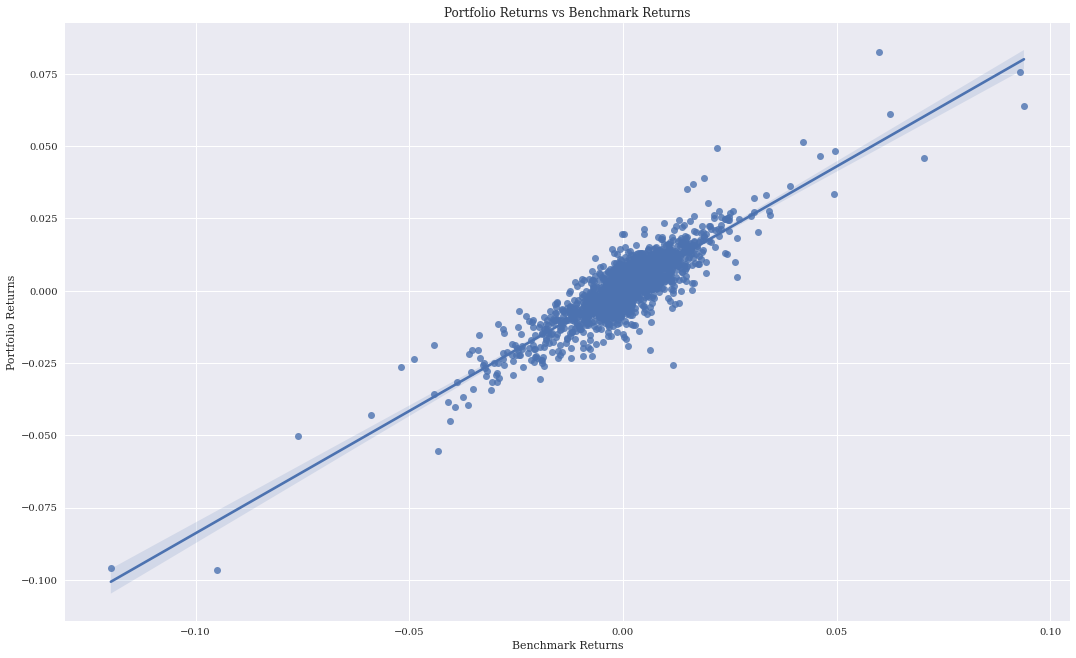

In [55]:
import seaborn as sns
#Once we have the benchmark returns, we can visualize the scatter plot of our portfolio returns versus benchmark returns.
sns.regplot(daily_bench_ret,daily_ret_p)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

We can see that our portfolio returns are highly correlated to the benchmark returns. We can use the regression model to calculate the portfolio beta and the portfolio alpha. We will us the linear regression model to calculate the alpha and the beta.

In [58]:
from scipy import stats

(beta, alpha) = stats.linregress(daily_bench_ret,daily_ret_p)[0:2]
                
print("The portfolio beta is", round(beta, 4))
print("The portfolio beta is", round(alpha,5))

The portfolio beta is 0.8455
The portfolio beta is 0.00071


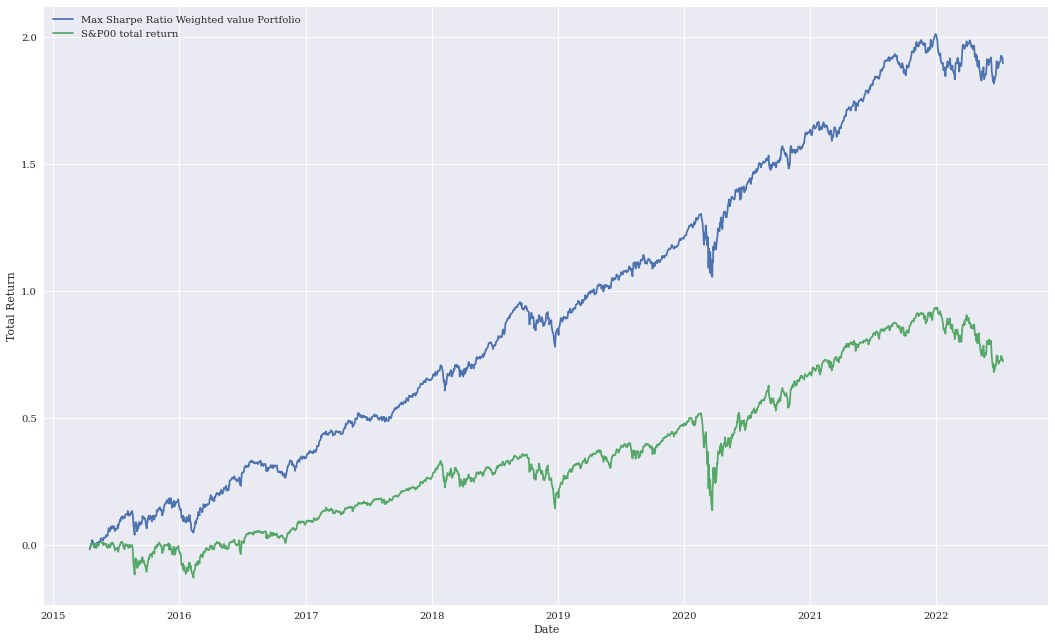

In [62]:
plt.plot(daily_ret_p.cumsum(), label='Max Sharpe Ratio Weighted value Portfolio')
plt.plot(daily_bench_ret.cumsum(), label='S&P00 total return')
plt.xlabel('Date')
plt.ylabel('Total Return')
plt.legend(loc="upper left")

In Bactest our value outperforms the benchmark significantly but I can help but to think something is fishy. The value proposition of this portfolio is also captured in the positive alpha and less than 1 beta. 